In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Hyperparameters

In [2]:
window = 30

# Preprocessing 

In [3]:
df = pd.read_excel('data.xlsx', engine='openpyxl')
df.head(10)

,ctx,codice_dm,lista_id,pers_sesso,pers_eta_ingresso_in_lista,diagnosi,diagnosi_specifica,eltr,lista_ingresso_data,tot_tx_organo,...,donatore_HBeAg,donatore_HBeAb,donatore_antiCoreTot,donatore_hbv_dna,donatore_hcv_rna,donatore_steatosiMacro,donatore_biopsiaEpatica,donatore_biopsiaRenale,donatore_livelloRischioPreLT,donatore_variazioneLivello
0,BOLOGNA,12898,20412,M,54,Altra epatopatia,NaN,NaN,2004-03-10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BOLOGNA,12908,20422,M,64,Cirrosi postnecrotica da HCV,NaN,NaN,2003-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BOLOGNA,12909,20423,M,56,Cirrosi criptogenetica o idiopatica,NaN,D11 : Cirrhosis-Cryptogenic (unknown) cirrhosis,2002-07-18,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOLOGNA,12913,20428,M,51,Cirrosi di Laennec (post-alcolica),NaN,NaN,2003-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BOLOGNA,12935,20450,M,43,Cirrosi postnecrotica da HCV,NaN,NaN,2004-01-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BOLOGNA,12937,20452,F,63,Epatocarcinoma associato a cirrosi,NaN,NaN,2003-12-29,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BOLOGNA,12939,20454,F,55,Cirrosi biliare primitiva,NaN,NaN,2003-10-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BOLOGNA,12958,20473,M,63,Cirrosi postnecrotica da HCV,NaN,NaN,2003-07-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BOLOGNA,12961,20476,M,62,Cirrosi postnecrotica da HBV HbsAg positiva,NaN,NaN,2003-07-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BOLOGNA,12964,20479,M,43,Cirrosi postnecrotica da HCV,NaN,NaN,2004-02-23,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove every attribute with 20% of missing values

In [4]:
missing_percent = {}
for column in df.columns:
    missing_percent[column] = df[column].isna().sum() / len(df)
for column in sorted(missing_percent, key=missing_percent.get, reverse=True):
    print('{}: {:.3f}'.format(column, missing_percent[column]))

Na: 1.000
fega_note: 0.999
donatore_diabete_insulinodipendente_desc: 0.999
donatore_bassaportata3_PAmin: 0.998
donatore_bassaportata3_data: 0.997
donatore_bassaportata3_ora: 0.997
donatore_bassaportata3_durata: 0.997
donatore_bassaportata3_PAmax: 0.997
donatore_bassaportata3_trattamento: 0.997
ISO2_tipo_super_urgenza: 0.997
donatore_bassaportata2_PAmin: 0.995
donatore_bassaportata2_PAmax: 0.993
donatore_bassaportata2_durata: 0.991
donatore_bassaportata2_ora: 0.990
donatore_bassaportata2_trattamento: 0.990
scheda48h_tipo_tx_effettivo_combinato: 0.989
donatore_biopsiaRenale: 0.989
donatore_bassaportata2_data: 0.988
donatore_note: 0.980
categoria_HCC: 0.977
diagnosi_specifica: 0.974
donatore_diabete_desc: 0.974
donatore_dislipidemie_desc: 0.970
trombosi_portale_note: 0.969
ISO2_Ecc. MELD: 0.969
donatore_bassaportata1_PAmin: 0.958
donatore_variazioneLivello: 0.954
tipo_combinato: 0.944
ric_eccezione_MELD_PELD: 0.944
donatore_bassaportata1_PAmax: 0.939
donatore_HBeAg: 0.939
donatore_bassapo

In [5]:
date_columns = ['data_trapianto', 'data_decesso', 'lista_uscita_data', 'lista_ingresso_data']
drop_list = [k for k, v in missing_percent.items() if v >= 0.198 and k not in date_columns] + \
            ['diagnosi', 'ctx', 'codice_dm', 'lista_id', 'causa_uscita', 'data_ultimo_agg_followup', 'data_UNOS']
print(drop_list)
df = df.drop(drop_list, axis=1)

['diagnosi_specifica', 'eltr', 'tot_tx_organo', 'tx_fegato_corrente', 'tipo_combinato', 'ric_DELTA', 'ric_HCV_RNA', 'ric_eccezione_MELD_PELD', 'Na', 'MELD_in_ingresso', 'MELD_in_uscita', 'chirurgia_addom_note', 'trombosi_portale_note', 'TIPS', 'ric_diabete', 'categoria_HCC', 'HCC_esordio', 'HCC_noduli', 'HCC_downstaging', 'HCC_diam_max', 'HCC_diam_totale', 'HCC_stadio_TNM', 'HCC_resezione', 'MELD_na', 'MELD_HCC', 'AFP', 'dialisi_ultimi_15gg', 'tx_effettivo_data', 'scheda48h_tx_effettivo_combinato', 'scheda48h_tipo_tx_effettivo_combinato', 'fega_note', 'CHILD', 'ISO2_tipo_super_urgenza', 'ISO2_Ecc. MELD', 'ISO2_valid_score', 'ISO2_valid_increment', 'ISO2_valid_giorni', 'ISO2_valid_mesi', 'ISO2_valid_anzianita', 'ISO2_allocazione', 'ric_ospedalizzazione_al_tx', 'organo_trapiantato', 'ischemia_fredda', 'ric_ripresa_funzionale', 'rigetto', 'ultimo_stato_tx', 'data_ultimo_agg_followup', 'codice_sit_donazione', 'donazione_ospedale', 'donazione_sede', 'donatore_eta', 'donatore_sesso', 'trap_d

### Encoding Categorical Attributes

In [6]:
categories = ['pers_sesso', 'ric_HCV', 'HCC', 'trombosi_portale', 'ric_HBsAg',
              'UNOS', 'ric_HIV', 'chirurgia_addom', 'iscriz_tx_comb', 'ISO2_super_urgenza']

In [7]:
df = pd.get_dummies(df, columns=categories, drop_first=True)

### Define Censored Data and Compute ToS

In [8]:
df['deceased'] = np.zeros(len(df)) 
df['transplanted'] = np.zeros(len(df))

In [9]:
for index, row in df.iterrows():
    if not row['data_trapianto'] is pd.NaT:
        # check if patient is transplanted
        df.at[index, 'transplanted'] = 1
    elif not row['data_decesso'] is pd.NaT:
        # check if patient is deceased 
        df.at[index, 'deceased'] = 1
    elif row['data_decesso'] is pd.NaT:
        # patients data are censored if we have a date signifing the exit from the waiting list, but not a 
        # confirmend death date. Thus, only deceased people are uncensored. 
        df.at[index, 'data_decesso'] = row['lista_uscita_data']
        
# compute Time of Survival as number of day/months/weeks spent on the list before exiting it or dying 
df['ToS'] = (df['data_decesso'] - df['lista_ingresso_data']).dt.days / window

In [10]:
df.head(10)

,pers_eta_ingresso_in_lista,lista_ingresso_data,Peso,Altezza,BMI,MELD_base,lista_uscita_data,data_decesso,data_trapianto,pers_sesso_M,...,UNOS_2A,UNOS_2B,UNOS_3,ric_HIV_SI,chirurgia_addom_SI,iscriz_tx_comb_SI,ISO2_super_urgenza_SI,deceased,transplanted,ToS
0,54,2004-03-10,71.0,168.0,25.16,8.0,2004-10-22,2013-08-01,2004-10-22,1,...,0,1,0,0,0,1,0,0.0,1.0,114.366667
1,64,2003-12-02,95.0,185.0,27.76,10.0,2010-01-12,2010-01-12,NaT,1,...,0,1,0,0,1,0,0,0.0,0.0,74.433333
2,56,2002-07-18,83.0,177.0,26.49,13.0,2016-06-09,2016-06-09,NaT,1,...,0,1,0,0,0,0,0,0.0,0.0,169.166667
3,51,2003-06-26,80.0,177.0,25.54,14.0,2004-01-28,2004-01-28,NaT,1,...,0,1,0,0,0,0,0,1.0,0.0,7.200000
4,43,2004-01-08,65.0,174.0,21.47,16.0,2005-06-11,2005-06-11,NaT,1,...,0,0,1,0,0,0,0,1.0,0.0,17.333333
5,63,2003-12-29,56.0,159.0,22.15,19.0,2004-12-01,2006-05-15,2004-12-01,0,...,0,1,0,0,1,0,0,0.0,1.0,28.933333
6,55,2003-10-02,47.0,160.0,18.36,13.0,2004-08-25,2004-08-25,NaT,0,...,0,1,0,0,1,0,0,1.0,0.0,10.933333
7,63,2003-07-31,77.0,166.0,27.94,21.0,2005-02-18,2005-02-18,NaT,1,...,0,1,0,0,0,0,0,1.0,0.0,18.933333
8,62,2003-07-24,85.0,186.0,24.57,16.0,2006-09-21,2006-09-21,NaT,1,...,0,0,0,0,1,0,0,0.0,0.0,38.500000
9,43,2004-02-23,NaN,NaN,NaN,18.0,2004-03-22,2004-03-22,2004-03-22,1,...,0,1,0,0,0,0,0,0.0,1.0,0.933333


# Building Machine Learning Model

## Non-transplanted

In [11]:
df_n_trans = df[df['transplanted'] == 0]
df_n_trans = df_n_trans.drop(date_columns + ['transplanted'], axis=1)
df_n_trans = df_n_trans.dropna()

In [12]:
X = df_n_trans.drop(['ToS', 'deceased'], axis=1)
y = df_n_trans[['ToS', 'deceased']]
X.head(10)

,pers_eta_ingresso_in_lista,Peso,Altezza,BMI,MELD_base,pers_sesso_M,ric_HCV_SI,HCC_SI,trombosi_portale_PARZIALE,trombosi_portale_SI,ric_HBsAg_SI,UNOS_2A,UNOS_2B,UNOS_3,ric_HIV_SI,chirurgia_addom_SI,iscriz_tx_comb_SI,ISO2_super_urgenza_SI
1,64,95.0,185.0,27.76,10.0,1,1,1,0,0,0,0,1,0,0,1,0,0
2,56,83.0,177.0,26.49,13.0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,51,80.0,177.0,25.54,14.0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,43,65.0,174.0,21.47,16.0,1,1,0,0,0,0,0,0,1,0,0,0,0
6,55,47.0,160.0,18.36,13.0,0,0,0,0,0,0,0,1,0,0,1,0,0
7,63,77.0,166.0,27.94,21.0,1,1,0,0,0,0,0,1,0,0,0,0,0
8,62,85.0,186.0,24.57,16.0,1,0,0,0,1,1,0,0,0,0,1,0,0
11,45,55.0,153.0,23.50,9.0,0,0,0,0,0,0,0,0,1,0,1,0,0
14,52,56.0,152.0,24.24,14.0,0,0,0,0,0,0,0,1,0,0,0,0,0
15,52,91.0,180.0,28.09,23.0,1,0,1,0,0,1,0,1,0,0,1,0,0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from src.model import *
from tensorflow.keras.callbacks import EarlyStopping

model = SurvivalNN(len(X.iloc[0]), hidden=[32, 32])
model.compile(optimizer='Adam')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(X_train.astype('float32'), y_train.astype('float32'),
                    batch_size=32, epochs=200, verbose=1, callbacks=[callback])

Epoch 1/200
19/19 [==============================] - 0s 1ms/step - loss: 303.4033
Epoch 2/200
19/19 [==============================] - 0s 1ms/step - loss: 114.8104
Epoch 3/200
19/19 [==============================] - 0s 1ms/step - loss: 74.2997
Epoch 4/200
19/19 [==============================] - 0s 1ms/step - loss: 68.6648
Epoch 5/200
19/19 [==============================] - 0s 1ms/step - loss: 66.4866
Epoch 6/200
19/19 [==============================] - 0s 1ms/step - loss: 66.5279
Epoch 7/200
19/19 [==============================] - 0s 1ms/step - loss: 67.1567
Epoch 8/200
19/19 [==============================] - 0s 1ms/step - loss: 67.1108
Epoch 9/200
19/19 [==============================] - 0s 1ms/step - loss: 66.6467
Epoch 10/200
19/19 [==============================] - 0s 1ms/step - loss: 67.2558


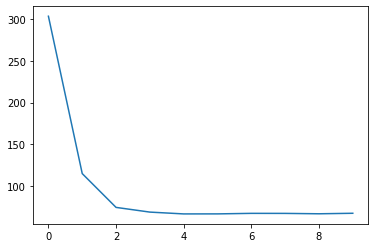

In [21]:
plt.plot(history.history['loss'])
plt.show()

In [25]:
logits = model.predict(X_test).ravel()
p = 1 - expit(logits)
eval(y_test['ToS'], p)

==> MUTUAL INFORMATION
4.660705919738341
==> JENSEN SHANNON DISTANCE
0.5285810517852993
==> LOGRANK TEST
= p-value: 6.043263352938564e-25
= test statistic: 106.39425652339716


/home/fbaldo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
